## Probspace 民泊サービスの宿泊料金予測
- 一泊の適正価格はいくら？
- EDA

### Google Driveのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'

Mounted at /content/drive
/content/drive/My Drive


### ライブラリのインストール、インポート

In [2]:
# カレントディレクトリを変更
import os
os.chdir('/content/drive/My Drive/Probdata/airbnb/')
print(os.getcwd())

/content/drive/My Drive/Probdata/airbnb


In [3]:
class Config():
    root_path = './'
    input_path = os.path.join(root_path, 'input')
    output_path = os.path.join(root_path, 'output')
    seed = 42
    debug = False

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### データの読み込み

In [5]:
train_df = pd.read_csv(f'{Config.input_path}/train_data.csv')
test_df = pd.read_csv(f'{Config.input_path}/test_data.csv')
station_list_df = pd.read_csv(f'{Config.input_path}/station_list.csv')
submission_df = pd.read_csv(f'{Config.input_path}/submission.csv')

In [6]:
print(len(train_df))
print(len(test_df))
print(len(station_list_df))
print(len(submission_df))

9990
4996
746
4996


## EDAの実施

In [12]:
station_list_df.iloc[0]

station_name            白丸
longitude       139.114861
latitude         35.811735
Name: 0, dtype: object

In [13]:
a = np.array(train_df.iloc[0]['latitude'], train_df.iloc[0]['longitude'])
b = np.array(station_list_df.iloc[0]['latitude'], station_list_df.iloc[0]['longitude'])
dist = np.linalg.norm(a - b)
dist

0.12988500000000158

In [7]:
display(train_df)

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,y
0,1,KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...,242899459,Koto Ku,35.68185,139.80310,Entire home/apt,1,55,2020-04-25,2.21,173,12008
1,2,Downtown Tokyo Iriya next to Ueno,308879948,Taito Ku,35.72063,139.78536,Entire home/apt,6,72,2020-03-25,2.11,9,6667
2,3,"Japan Style,Private,Affordable,4min to Sta.",300877823,Katsushika Ku,35.74723,139.82349,Entire home/apt,1,18,2020-03-23,3.46,288,9923
3,4,4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi,236935461,Shibuya Ku,35.68456,139.68077,Entire home/apt,1,2,2020-04-02,1.76,87,8109
4,5,LICENSED SHINJUKU HOUSE: Heart of the action!,243408889,Shinjuku Ku,35.69840,139.70467,Entire home/apt,1,86,2020-01-30,2.00,156,100390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,9986,Shinjuku Kabukicho2 / Shinjuku 3min walk,59104733,Shinjuku Ku,35.69728,139.70321,Entire home/apt,1,1,2019-12-09,0.21,357,13505
9986,9987,Hostel just 1 min from Sta. / Dorm with curtain,131595566,Taito Ku,35.70407,139.79180,Shared room,1,0,NaN,NaN,153,3279
9987,9988,Hostel just 5 min from Sta./4 bed room with bath,147026065,Taito Ku,35.71501,139.79417,Private room,1,5,2019-12-10,0.22,156,14898
9988,9989,SHITARA HOUSE dormitory B,316273494,Katsushika Ku,35.74672,139.82925,Shared room,1,1,2020-01-01,0.25,0,3950


In [8]:
test_df.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,1,"5-minute walk from Akasaka Sta, Superior double",184730720,Minato Ku,35.67131,139.73285,Private room,1,0,NaN,NaN,183
1,2,7 min Sta.-Center of IKEBUKURO Cozy Room#503,20993205,Toshima Ku,35.73014,139.71739,Entire home/apt,2,21,2020-04-16,1.94,337
2,3,Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min,322521715,Setagaya Ku,35.66193,139.66540,Entire home/apt,1,14,2020-02-12,0.82,240
3,4,Komagome Station 2 minutes on foot,234477095,Toshima Ku,35.73603,139.74794,Entire home/apt,1,16,2020-02-17,1.19,0
4,5,"Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara",145453833,Taito Ku,35.72126,139.78320,Entire home/apt,30,2,2019-07-21,0.19,164


In [9]:
submission_df.head()

,id,y
0,1,49108
1,2,12644
2,3,34576
3,4,87371
4,5,287


In [10]:
station_list_df.head()

,station_name,longitude,latitude
0,白丸,139.114861,35.811735
1,古里,139.152102,35.816247
2,川井,139.164290,35.813697
3,御嶽,139.182589,35.801468
4,沢井,139.193324,35.805940


(array([9.357e+03, 4.600e+02, 4.200e+01, 2.400e+01, 6.000e+00, 5.100e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.500e+01,
        4.000e+00, 3.000e+00]),
 array([9.210000e+02, 5.088010e+04, 1.008392e+05, 1.507983e+05,
        2.007574e+05, 2.507165e+05, 3.006756e+05, 3.506347e+05,
        4.005938e+05, 4.505529e+05, 5.005120e+05, 5.504711e+05,
        6.004302e+05, 6.503893e+05, 7.003484e+05, 7.503075e+05,
        8.002666e+05, 8.502257e+05, 9.001848e+05, 9.501439e+05,
        1.000103e+06]),
 <a list of 20 Patch objects>)

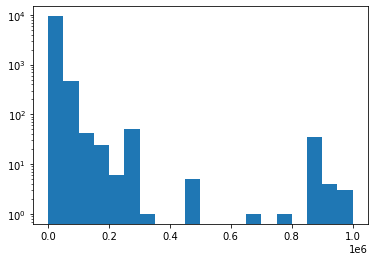

In [ ]:
plt.hist(train_df['y'], log=True, bins=20)

In [ ]:
train_df.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,y
count,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,8291.000000,9990.000000,9.990000e+03
mean,4995.500000,1.741013e+08,35.699999,139.742668,3.331331,25.943143,1.700127,157.202102,2.510464e+04
std,2884.008929,9.838786e+07,0.040132,0.054896,8.504451,40.586283,1.402640,115.780646,6.704985e+04
min,1.000000,1.519770e+05,35.540990,139.575070,1.000000,0.000000,0.020000,0.000000,9.210000e+02
25%,2498.250000,7.880350e+07,35.687173,139.702483,1.000000,2.000000,0.680000,63.000000,6.960750e+03
50%,4995.500000,1.881232e+08,35.703460,139.732830,1.000000,11.000000,1.480000,154.000000,1.189250e+04
75%,7492.750000,2.526661e+08,35.725695,139.785420,2.000000,33.000000,2.420000,248.000000,2.008500e+04
max,9990.000000,3.442701e+08,35.815950,139.911970,365.000000,529.000000,43.600000,365.000000,1.000103e+06


In [ ]:
train_df.columns

Index(['id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'y'],
      dtype='object')

In [ ]:
print(len(train_df['name'].unique()))
print(len(train_df))

9114
9990


In [ ]:
print(train_df['neighbourhood'].unique())
print(len(train_df['neighbourhood'].unique()))

['Koto Ku' 'Taito Ku' 'Katsushika Ku' 'Shibuya Ku' 'Shinjuku Ku'
 'Arakawa Ku' 'Toshima Ku' 'Ota Ku' 'Setagaya Ku' 'Kita Ku' 'Edogawa Ku'
 'Chuo Ku' 'Minato Ku' 'Shinagawa Ku' 'Sumida Ku' 'Nakano Ku'
 'Suginami Ku' 'Itabashi Ku' 'Chiyoda Ku' 'Adachi Ku' 'Meguro Ku'
 'Bunkyo Ku' 'Nerima Ku']
23


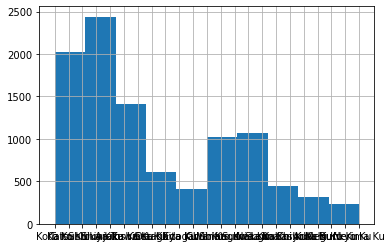

In [ ]:
train_df['neighbourhood'].hist()

In [ ]:
print(train_df['room_type'].unique())
print(len(train_df['room_type'].unique()))

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
4
